In [1]:
from keras.datasets import mnist
from sklearn.utils import shuffle
from models.VLAE import VLAE


vlae = VLAE(input_dim=(28, 28, 1), log_dir="", use_dropout=True, use_batch_norm=True, inf0_kernels_strides_featuremaps=[(5, 2, 64)],
                                                                   inf1_kernels_strides_featuremaps=[(3, 2, 64)],
                                                                   ladder0_kernels_strides_featuremaps=[(5, 2, 64)],
                                                                   ladder1_kernels_strides_featuremaps=[(5, 1, 64)],
                                                                   ladder2_kernels_strides_featuremaps=[(3, 1, 64), (3, 1, 64)],
                                                                   gen2_num_units=[1024, 1024],
                                                                   gen1_num_units=[1024, 1024],
                                                                   gen0_kernels_strides_featuremaps=[(5, 2, 64), (5, 2, 1)], kernel_visualization_layer=1, num_samples=1, feature_map_layers=[1], inner_activation="ReLU", decay_rate=0, feature_map_reduction_factor=1, z_dims=[2,2,2])
vlae.load_weights("/Users/leo/Downloads/vlae_mnist_13_05_2020.h5")

Using TensorFlow backend.













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [2]:
from models.VAE import VAE

vae = VAE(input_dim=(128,128,1),encoder_conv_filters=[32, 64, 64, 64],encoder_conv_kernel_size=[3, 3, 3, 3], encoder_conv_strides=[2, 2, 2, 2],decoder_conv_t_filters=[64, 64, 32, 1],decoder_conv_t_kernel_size=[3, 3, 3, 3],decoder_conv_t_strides=[2, 2, 2, 2],z_dims=[2], log_dir="", feature_map_layers=[], kernel_visualization_layer=1, dropout_rate=0.3, use_batch_norm=True, use_dropout=True)
vae.load_weights("/Users/leo/Downloads/vanilla_vae.h5")

In [3]:
import keras
vlaegan = keras.models.load_model('/Users/leo/Downloads/vlae_gan_mnist.h5')
vlaegan_decoder = vlaegan.layers[-1]

/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
vaegan = keras.models.load_model('/Users/leo/Downloads/vae_gan_mnist.h5')
vaegan_decoder = vaegan.layers[-1]

In [5]:
import numpy as np
import scipy as sp
from utils.img_ops import resize_array
(_,_),(mnists,_) = mnist.load_data()
mnists = shuffle(mnists)
mnists = mnists.reshape((mnists.shape[0], -1))
mnist_mean = np.mean(mnists, axis=1)
mnist_sd = np.std(mnists, axis=1)
mnist_skew = sp.stats.skew(mnists, axis=1)
mnist_kurt = sp.stats.kurtosis(mnists, axis=1)

vlae_gens = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
vlae_gens = np.stack(vlae_gens)
vlae_gens *= 255.0
vlae_gens = vlae_gens.reshape(vlae_gens.shape[0], -1)
vlae_gens_mean = np.mean(vlae_gens, axis=1)
vlae_gens_sd = np.std(vlae_gens, axis=1)
vlae_gens_skew = sp.stats.skew(vlae_gens, axis=1)
vlae_gens_kurt = sp.stats.kurtosis(vlae_gens, axis=1)

vlaegan_gens = vlaegan_decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
vlaegan_gens = np.stack(vlaegan_gens)
vlaegan_gens *= 255.0
vlaegan_gens = vlaegan_gens.reshape(vlaegan_gens.shape[0], -1)
vlaegan_gens_mean = np.mean(vlaegan_gens, axis=1)
vlaegan_gens_sd = np.std(vlaegan_gens, axis=1)
vlaegan_gens_skew = sp.stats.skew(vlaegan_gens, axis=1)
vlaegan_gens_kurt = sp.stats.kurtosis(vlaegan_gens, axis=1)

vaegan_gens = vaegan_decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000).squeeze())
vaegan_gens = np.stack(vaegan_gens)
vaegan_gens *= 255.0
vaegan_gens = vaegan_gens.reshape(vaegan_gens.shape[0], -1)
vaegan_gens_mean = np.mean(vaegan_gens, axis=1)
vaegan_gens_sd = np.std(vaegan_gens, axis=1)
vaegan_gens_skew = sp.stats.skew(vaegan_gens, axis=1)
vaegan_gens_kurt = sp.stats.kurtosis(vaegan_gens, axis=1)

vae_gens = vae.decoder.predict(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000))
vae_gens = np.stack(vae_gens)
vae_gens *= 255.0
vae_gens = resize_array(vae_gens, (28,28), False)
vae_gens = vae_gens.reshape(vae_gens.shape[0], -1)
vae_gens_mean = np.mean(vae_gens, axis=1)
vae_gens_sd = np.std(vae_gens, axis=1)
vae_gens_skew = sp.stats.skew(vae_gens, axis=1)
vae_gens_kurt = sp.stats.kurtosis(vae_gens, axis=1)

In [6]:
import scipy as sp

print("vae mean",sp.stats.wilcoxon(mnist_mean, vae_gens_mean))
print("vae sd",sp.stats.wilcoxon(mnist_sd, vae_gens_sd))
print("vae skew",sp.stats.wilcoxon(mnist_skew, vae_gens_skew))
print("vae kurt",sp.stats.wilcoxon(mnist_kurt, vae_gens_kurt))
print('---')
print("vlae mean",sp.stats.wilcoxon(mnist_mean, vlae_gens_mean))
print("vlae sd",sp.stats.wilcoxon(mnist_sd, vlae_gens_sd))
print("vlae skew",sp.stats.wilcoxon(mnist_skew, vlae_gens_skew))
print("vlae kurt",sp.stats.wilcoxon(mnist_kurt, vlae_gens_kurt))
print('---')
print("vlae gan mean",sp.stats.wilcoxon(mnist_mean, vlaegan_gens_mean))
print("vlae gan sd",sp.stats.wilcoxon(mnist_sd, vlaegan_gens_sd))
print("vlae gan skew",sp.stats.wilcoxon(mnist_skew, vlaegan_gens_skew))
print("vlae gan kurt",sp.stats.wilcoxon(mnist_kurt, vlaegan_gens_kurt))
print('---')
print("vae gan mean",sp.stats.wilcoxon(mnist_mean, vaegan_gens_mean))
print("vae gan sd",sp.stats.wilcoxon(mnist_sd, vaegan_gens_sd))
print("vae gan skew",sp.stats.wilcoxon(mnist_skew, vaegan_gens_skew))
print("vae gan kurt",sp.stats.wilcoxon(mnist_kurt, vaegan_gens_kurt))


vae mean WilcoxonResult(statistic=9481138.5, pvalue=0.0)
vae sd WilcoxonResult(statistic=7178733.0, pvalue=0.0)
vae skew WilcoxonResult(statistic=3397043.0, pvalue=0.0)
vae kurt WilcoxonResult(statistic=5276639.0, pvalue=0.0)
---
vlae mean WilcoxonResult(statistic=18795609.0, pvalue=1.5673580764032752e-102)
vlae sd WilcoxonResult(statistic=5663026.0, pvalue=0.0)
vlae skew WilcoxonResult(statistic=22118282.0, pvalue=1.677759177620973e-23)
vlae kurt WilcoxonResult(statistic=24260579.0, pvalue=0.010172875825045485)
---
vlae gan mean WilcoxonResult(statistic=21913069.0, pvalue=1.0035985953273921e-26)
vlae gan sd WilcoxonResult(statistic=21524804.0, pvalue=2.0312651354821352e-33)
vlae gan skew WilcoxonResult(statistic=24323577.0, pvalue=0.018688750213750223)
vlae gan kurt WilcoxonResult(statistic=24631992.0, pvalue=0.19935858928260408)
---
vae gan mean WilcoxonResult(statistic=9157149.0, pvalue=0.0)
vae gan sd WilcoxonResult(statistic=6742030.0, pvalue=0.0)
vae gan skew WilcoxonResult(stati

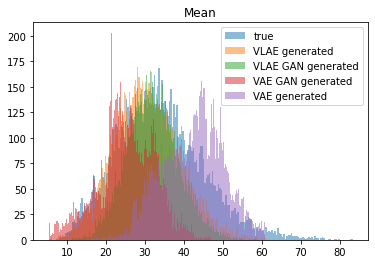

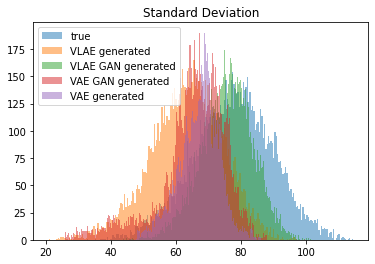

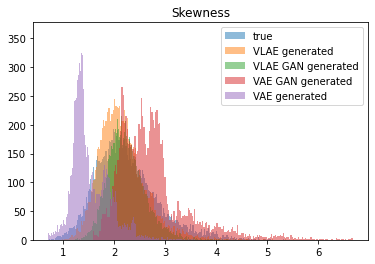

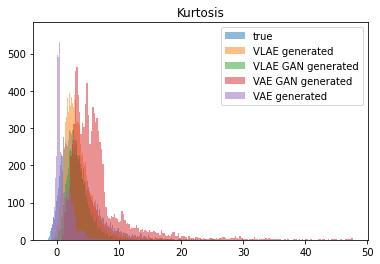

In [7]:
from matplotlib import pyplot as plt

bins = 200
plt.title("Mean")
plt.hist(mnist_mean, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_mean, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_mean, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_mean, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_mean, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Standard Deviation")
plt.hist(mnist_sd, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_sd, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_sd, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_sd, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_sd, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Skewness")
plt.hist(mnist_skew, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_skew, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_skew, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_skew, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_skew, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()
plt.title("Kurtosis")
plt.hist(mnist_kurt, bins, alpha=0.5, label="true")
plt.hist(vlae_gens_kurt, bins, alpha=0.5, label="VLAE generated")
plt.hist(vlaegan_gens_kurt, bins, alpha=0.5, label="VLAE GAN generated")
plt.hist(vaegan_gens_kurt, bins, alpha=0.5, label="VAE GAN generated")
plt.hist(vae_gens_kurt, bins, alpha=0.5, label="VAE generated")
plt.legend()
plt.show()
plt.close()

In [8]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.datasets import mnist
import numpy as np

(x_train, _), (_, _) = mnist.load_data()
preds_train = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=60000) for _ in range(3)]).squeeze()
x_train = np.concatenate([x_train, preds_train], axis=0)
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.concatenate([np.zeros((60000)), np.ones((60000))])
x_train, y_train = shuffle(x_train, y_train)

x = inpt = Input(shape=(28,28,1))
x = Conv2D(batch_input_shape=(28,28,1), filters=20, kernel_size=5)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Conv2D(filters=20, kernel_size=3)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(100)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = outpt = Dense(1, activation='sigmoid')(x)

model = Model(inpt, outpt)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 24, 24, 20)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 22, 22, 20)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 22, 22, 20)        80        
__________

In [9]:
(_, _), (x_test, _) = mnist.load_data()
preds_test = vlae.decoder.predict([np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=10000) for _ in range(3)]).squeeze()
x_test = np.concatenate([x_test, preds_test], axis=0)
x_test = np.expand_dims(x_test, axis=-1)
y_test = np.concatenate([np.zeros((10000)), np.ones((10000))])
x_test, y_test = shuffle(x_test, y_test)
# model.evaluate(x_test, y_test)



In [10]:
from models.model_abstract import ModelWrapper

def avg_gen_for_a(a: np.ndarray, num_zs: int, num_samples: int):

    def avg_gen_for_a_and_z(z_idx: int):
        zs = [np.expand_dims(np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_samples), 0) for _ in range(num_zs)]
        zs[z_idx] = np.array([a for _ in range(num_samples)])
        zs[z_idx] = zs[z_idx].swapaxes(0,1)
        zs = np.concatenate(zs)
        gens = vlae.decoder.predict(list(zs)) * 255.0
        #gens = [vlae.decoder.predict([zs[j, i] for j in range(3)] for i in range(num_samples))]
        return np.mean(gens, axis=0)

    return np.array([avg_gen_for_a_and_z(z_idx) for z_idx in range(num_zs)])

num_as = 100
num_samples = 300
a_s = np.random.multivariate_normal([0.,0.], [[1.0, 0.0],[0.0, 1.0]], size=num_as)
gens = np.array([avg_gen_for_a(np.expand_dims(a,0), 3, num_samples) for a in a_s])

In [11]:
from utils.statistic import cross_cumulants
import matplotlib
%matplotlib inline
print("a")
for i in range(28):
    for j in range(28):
        pxl = gens[:,0,i,j,0]
        pxl = np.stack([pxl, pxl], axis=1)
        #print(cross_cumulants(pxl))
        
rows = 28
cols = 28
fig1, ax1 = plt.subplots(nrows=rows,ncols=cols,sharex=True,sharey=True, figsize=(rows, cols))
fig2, ax2 = plt.subplots(nrows=rows,ncols=cols,sharex=True,sharey=True, figsize=(rows, cols))
k=0
vmin = np.inf
vmax = -np.inf
ccs = {}
for i in range(28):
    ccs[i] = {}
    for j in range(28):
        g1 = np.copy(gens[:,0,i,j,0])
        g2 = np.copy(gens[:,1,i,j,0])
        cc = cross_cumulants(np.stack((g1, g2),axis=-1))
        ccs[i][j] = cc
        c_min, c_max = np.min(cc), np.max(cc)
        if c_min < vmin: vmin = c_min
        if c_max > vmax: vmax = c_max
        #print(np.max(g1), np.max(g2))
        row = k//rows
        col = k%cols
        #print("k {} row {} col {}".format(k, row, col))
        #ax1[row,col].plot(g1,g2,'.')
k=0
from matplotlib import cm
viridis = cm.get_cmap('viridis', 256)
for i in range(28):
    for j in range(28):
        row = k//(rows)
        col = k%cols
        ax2[row,col].text(x=0,y=0,s="{:.1E}".format(ccs[i][j]))
        ax2[row,col].set_facecolor(viridis((ccs[i][j]-vmin)/vmax))
        k+=1
fig1.xlabel = "Mean pixel itensity first component"
fig2.xlabel = "Mean pixel itensity first component"
fig1.ylabel = "Mean pixel intensity second component"
fig2.ylabel = "Mean pixel intensity second component"
fig2.savefig("AGGRU2.png")
#fig1.savefig("AGGRU.png")

#plt.plot(gens[:,0,14,14,0],gens[:,2,14,14,0],'.')
#plt.plot(gens[:,1,14,14,0],gens[:,2,14,14,0],'.')

a
Error in callback <function flush_figures at 0x116f51840> (for post_execute):


KeyboardInterrupt: 

In [15]:
from keras.datasets import mnist
import os, csv
from utils.img_ops import resize_array, feature_maps_of_layers

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_128 = resize_array(x_train, (128,128), False) / 255.0
x_train = x_train / 255.0
# read morpho mnist
morpho_headers = []
morpho_train = {}
with open(os.path.join('../data/train-morpho.csv'), newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar="'")
    for i, row in enumerate(spamreader):
        if i == 0:
            for header in row:
                morpho_train.setdefault(header, [])
                morpho_headers.append(header)
        else:
            for j, cell in enumerate(row):
                morpho_train[morpho_headers[j]].append(float(cell))

317


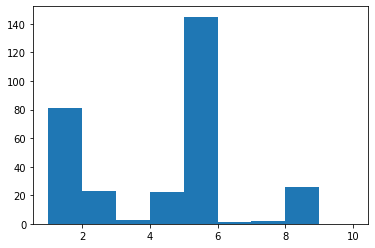

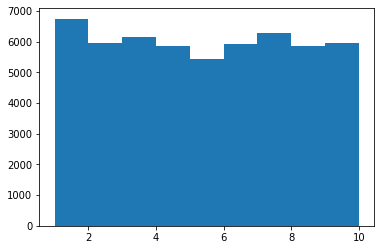

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
slants = np.array(morpho_train['slant'])
high_slants_idx = np.where(slants > .7)
high_slants_128 = x_train_128[high_slants_idx]
high_slants = x_train[high_slants_idx]

classes = y_train[high_slants_idx]
print(len(high_slants))
plt.hist(classes, bins=list(range(1,11)))
plt.show()
plt.hist(y_train, bins=list(range(1,11)))
plt.show()

VAE encoder Index 1
0.9999951


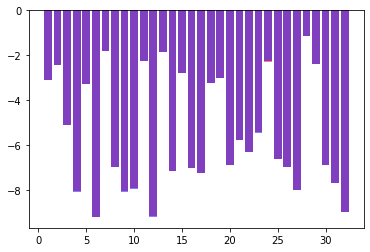

VAE encoder Index 5
0.9960508


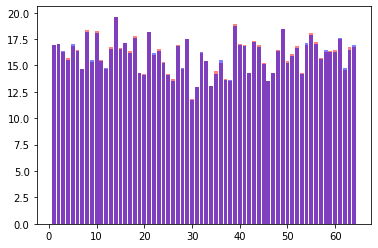

VAE encoder Index 9
0.9821292


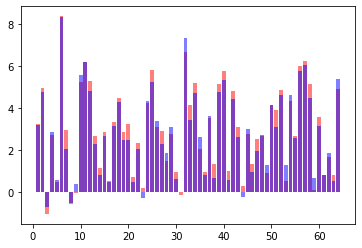

VAE encoder Index 13
0.92487174


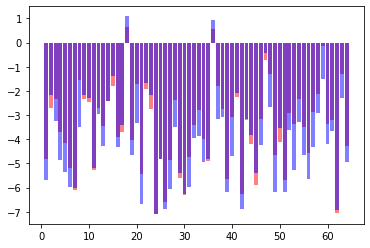

VLAE encoder Index 1
0.9607913


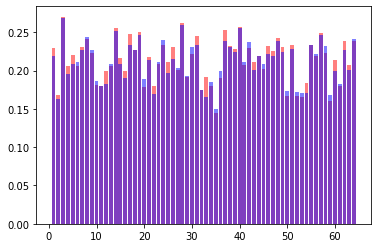

VLAE encoder Index 4
0.9842347


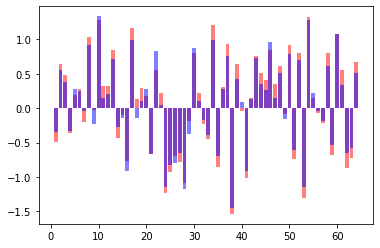

VLAE encoder Index 8
0.9720578


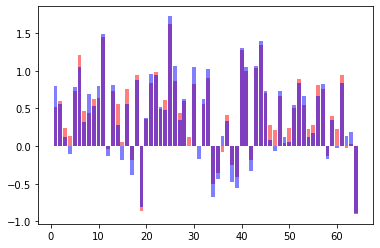

VLAE encoder Index 12
0.95126057


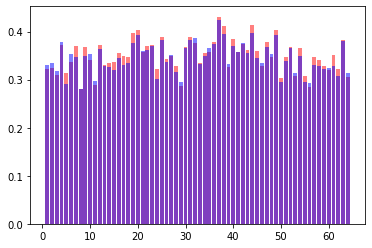

VLAE encoder Index 13
0.9694099


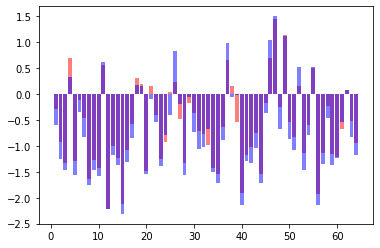

VLAE encoder Index 14
0.98219305


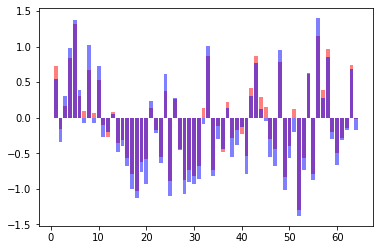

In [49]:
import sklearn
from utils.statistic import correlation_coefficient

vae_encoder_idx = [1, 5, 9, 13]
vlae_encoder_idx = [1, 4, 8, 12, 13, 14]


for idx in vae_encoder_idx:
    print("VAE encoder Index {}".format(idx))
    gt_vae = feature_maps_of_layers(vae.encoder, vae_encoder_idx, np.expand_dims(sklearn.utils.shuffle(x_train_128)[:1000], -1))
        
    slant_vae = feature_maps_of_layers(vae.encoder, vae_encoder_idx, np.expand_dims(sklearn.utils.shuffle(high_slants_128)[:1000], -1))
        
    gt_vae_sum_over_fm = np.mean(gt_vae[idx], axis=(1,2))
    slant_vae_sum_over_fm = np.mean(slant_vae[idx], axis=(1,2))
        
    gt_vae_mean_over_samples = np.mean(gt_vae_sum_over_fm, axis=0)
    slant_vae_mean_over_samples = np.mean(slant_vae_sum_over_fm, axis=0)
        
    print(correlation_coefficient(slant_vae_mean_over_samples,gt_vae_mean_over_samples))
        
    #plt.bar(x=list(range(1,len(gt_mean_over_samples)+1)),height=gt_mean_over_samples, alpha=0.5, color='red')
    plt.bar(x=list(range(1,len(slant_vae_mean_over_samples)+1)),height=slant_vae_mean_over_samples, alpha=0.5, color='red')
    plt.bar(x=list(range(1,len(gt_vae_mean_over_samples)+1)),height=gt_vae_mean_over_samples, alpha=0.5, color='blue')
    plt.show()
for idx in vlae_encoder_idx:
    print("VLAE encoder Index {}".format(idx))
    gt_vlae = feature_maps_of_layers(vlae.encoder, vlae_encoder_idx, np.expand_dims(sklearn.utils.shuffle(x_train)[:1000], -1))
    slant_vlae = feature_maps_of_layers(vlae.encoder, vlae_encoder_idx, np.expand_dims(sklearn.utils.shuffle(high_slants)[:1000], -1))
        
    gt_vlae_sum_over_fm = np.mean(gt_vlae[idx], axis=(1,2))
    slant_vlae_sum_over_fm = np.mean(slant_vlae[idx], axis=(1,2))
        
    gt_vlae_mean_over_samples = np.mean(gt_vlae_sum_over_fm, axis=0)
    slant_vlae_mean_over_samples = np.mean(slant_vlae_sum_over_fm, axis=0)
        
    print(correlation_coefficient(slant_vlae_mean_over_samples,gt_vlae_mean_over_samples))
    
    plt.bar(x=list(range(1,len(slant_vlae_mean_over_samples)+1)),height=slant_vlae_mean_over_samples, alpha=0.5, color='red')
    plt.bar(x=list(range(1,len(gt_vlae_mean_over_samples)+1)),height=gt_vlae_mean_over_samples, alpha=0.5, color='blue')
    plt.show()

In [17]:
import sklearn

hs_vlae_layers = vlae.encoder.predict(np.expand_dims(high_slants, -1))
hs_vae_layer = vae.encoder.predict(np.expand_dims(high_slants_128, -1))
hs_vlae_means = [np.mean(hs_layer, axis=0) for hs_layer in hs_vlae_layers]
hs_vae_mean = np.mean(hs_vae_layer, axis=0)
num_vlae_means = {}
num_vae_means = {}
for num in range(10):
    num_idxs = sklearn.utils.shuffle(np.where(y_train == num))[:1000]
    n_vlae_layers = vlae.encoder.predict(np.expand_dims(x_train[num_idxs], -1))
    n_vae_layer = vae.encoder.predict(np.expand_dims(x_train_128[num_idxs], -1))
    n_vlae_means = [np.mean(n_layer, axis=0) for n_layer in n_vlae_layers]
    n_vae_mean = np.mean(n_vae_layer, axis=0)
    num_vlae_means[num] = n_vlae_means
    num_vae_means[num] = n_vae_mean

/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


In [18]:
gt_vlae_generated = [np.random.standard_normal((1000,2)) for _ in range(3)]
gt_vae_generated = np.random.standard_normal((1000,2))
high_slant_vlae_generated = [np.random.normal(loc = hs_mean, size=(1000,2)) for hs_mean in hs_vlae_means]
high_slant_vae_generated = np.random.normal(loc = hs_vae_mean, size=(1000,2))
num_vlae_generated = {}
num_vae_generated = {}
for k in num_vlae_means.keys():
    num_vlae_generated[k] = [np.random.normal(loc = w, size=(1000,2)) for w in num_vlae_means[k]]
    num_vae_generated[k] = np.random.normal(loc = num_vae_means[k], size=(1000,2))

VAE decoder Index 1
0.95476556


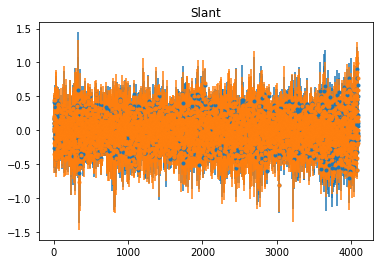

VAE decoder Index 3
0.9999451


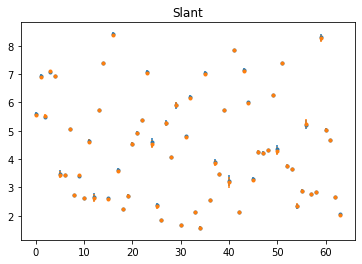

VAE decoder Index 7
0.9999964


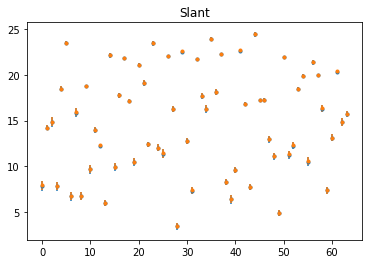

VAE decoder Index 11
0.9999951


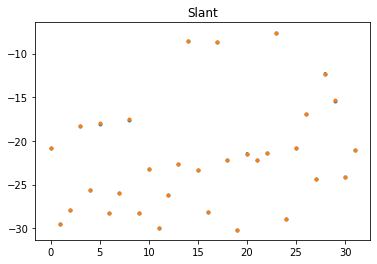

VAE decoder Index 15
nan


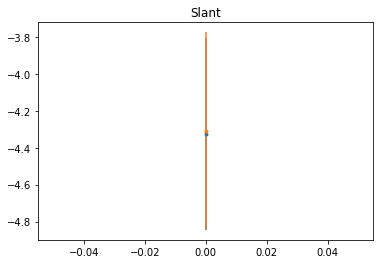

VLAE decoder Index 1
0.3578735
VLAE decoder Index 5
0.7709482
VLAE decoder Index 11
0.75577015
VLAE decoder Index 15
0.75149167
VLAE decoder Index 21
0.647991
VLAE decoder Index 26
0.9978721
VLAE decoder Index 30
nan


In [55]:
import sklearn
from utils.statistic import correlation_coefficient

vae_decoder_idx = [1, 3, 7, 11, 15]
vlae_decoder_idx = [1, 5, 11, 15, 21, 26, 30]

for idx in vae_decoder_idx:
    print("VAE decoder Index {}".format(idx))
    gt_vae = feature_maps_of_layers(vae.decoder, vae_decoder_idx, gt_vae_generated)
        
    slant_vae = feature_maps_of_layers(vae.decoder, vae_decoder_idx, high_slant_vae_generated)
        
    gt_vae_sum_over_fm = np.mean(gt_vae[idx], axis=(1,2)) if len(gt_vae[idx].shape) == 4 else gt_vae[idx]
    slant_vae_sum_over_fm = np.mean(slant_vae[idx], axis=(1,2)) if len(slant_vae[idx].shape) == 4 else slant_vae[idx]

    std_gt = np.std(gt_vae_sum_over_fm, axis = 0)
    std_slant = np.std(slant_vae_sum_over_fm, axis = 0)
    gt_vae_mean_over_samples = np.mean(gt_vae_sum_over_fm, axis=0)
    slant_vae_mean_over_samples = np.mean(slant_vae_sum_over_fm, axis=0)
        
    print(correlation_coefficient(slant_vae_mean_over_samples, gt_vae_mean_over_samples))
    
    plt.errorbar(list(range(len(std_gt))),gt_vae_mean_over_samples, std_gt, linestyle='None', marker='.')
    plt.errorbar(list(range(len(std_slant))),slant_vae_mean_over_samples, std_slant, linestyle='None', marker='.')
    plt.title("Slant")
    plt.show()
    #plt.bar(x=list(range(1,len(gt_mean_over_samples)+1)),height=gt_mean_over_samples, alpha=0.5, color='red')
    #plt.bar(x=list(range(1,len(slant_vae_mean_over_samples)+1)),height=slant_vae_mean_over_samples, alpha=0.5, color='red')
    #plt.bar(x=list(range(1,len(gt_vae_mean_over_samples)+1)),height=gt_vae_mean_over_samples, alpha=0.5, color='blue')
    
for idx in vlae_decoder_idx:
    print("VLAE decoder Index {}".format(idx))
    gt_vlae = feature_maps_of_layers(vlae.decoder, vlae_decoder_idx, gt_vlae_generated)
    slant_vlae = feature_maps_of_layers(vlae.decoder, vlae_decoder_idx, high_slant_vlae_generated)
        
    gt_vlae_sum_over_fm = np.mean(gt_vlae[idx], axis=(1,2)) if len(gt_vlae[idx].shape) == 4 else gt_vlae[idx]
    slant_vlae_sum_over_fm = np.mean(slant_vlae[idx], axis=(1,2)) if len(slant_vlae[idx].shape) == 4 else slant_vlae[idx]
        
    gt_vlae_mean_over_samples = np.mean(gt_vlae_sum_over_fm, axis=0)
    slant_vlae_mean_over_samples = np.mean(slant_vlae_sum_over_fm, axis=0)
        
    print(correlation_coefficient(slant_vlae_mean_over_samples, gt_vlae_mean_over_samples))
        
    #plt.bar(x=list(range(1,len(slant_vlae_mean_over_samples)+1)),height=slant_vlae_mean_over_samples, alpha=0.5, color='red')
    #plt.bar(x=list(range(1,len(gt_vlae_mean_over_samples)+1)),height=gt_vlae_mean_over_samples, alpha=0.5, color='blue')
    #plt.show()

In [19]:
vae_28 = VAE(input_dim=(28,28,1), encoder_conv_filters=[32, 64, 64, 64],
                    encoder_conv_kernel_size=[3, 3, 3, 3], encoder_conv_strides=[2, 2, 1, 1],
                    decoder_conv_t_filters=[64, 64, 32, 1],
                    decoder_conv_t_kernel_size=[3, 3, 3, 3],
                    decoder_conv_t_strides=[1, 1, 2, 2], log_dir='', z_dims=[2],
                    feature_map_layers=[], use_batch_norm=True,kernel_visualization_layer=-1,
                    decay_rate=0., num_samples=1,
                    feature_map_reduction_factor=1,
                    inner_activation='ReLU', dropout_rate=0.3)
vae_28.load_weights('/Users/leo/Downloads/vae_28.h5')

In [20]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (_, _) = mnist.load_data()
y_train = sklearn.preprocessing.OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
x_train = np.expand_dims(x_train, axis=-1)
x_train, y_train = shuffle(x_train, y_train)

x = inpt = Input(shape=(28,28,1))
x = Conv2D(batch_input_shape=(28,28,1), filters=20, kernel_size=5)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Conv2D(filters=20, kernel_size=3)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(100)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = outpt = Dense(10, activation='softmax')(x)

model = Model(inpt, outpt)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 24, 24, 20)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 20)        3620      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 22, 22, 20)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 22, 22, 20)        80        
__________

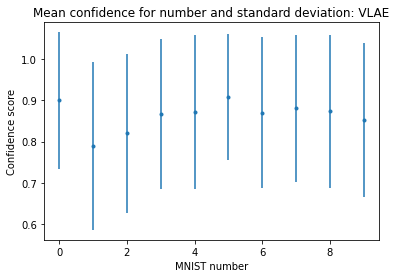

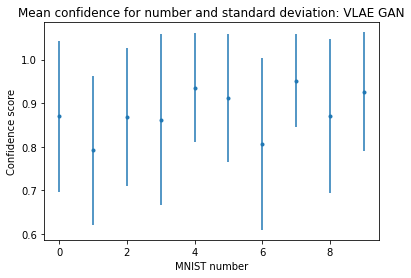

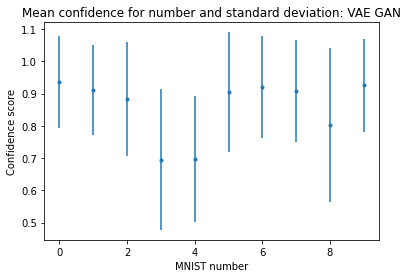

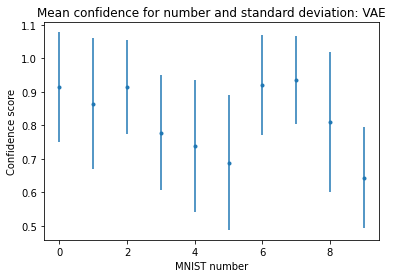

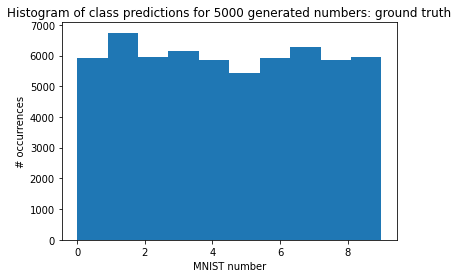

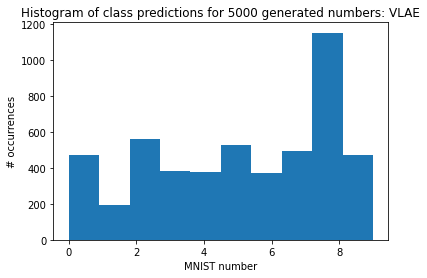

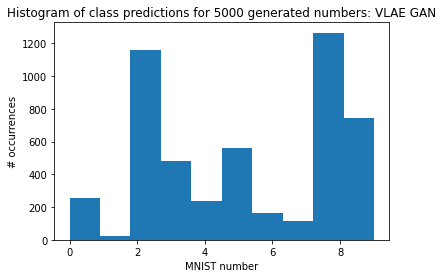

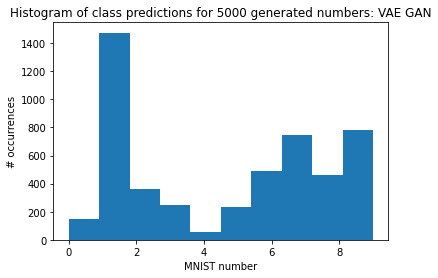

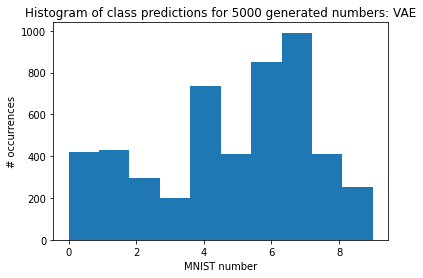

In [21]:
samples = 5000

(x_train, y_train) , _ = mnist.load_data()

vlae_generated = vlae.decoder.predict([np.random.normal(size=(samples,2),loc=(0, 0)),np.random.normal(size=(samples,2),loc=(0,0)),np.random.normal(loc=(0,0), size=(samples,2))]).squeeze()*255.0
vlaegan_generated = vlaegan_decoder.predict([np.random.normal(size=(samples,2),loc=(0, 0)),np.random.normal(size=(samples,2),loc=(0,0)),np.random.normal(loc=(0,0), size=(samples,2))]).squeeze()*255.0
vaegan_generated = vaegan_decoder.predict(np.random.normal(size=(samples,2),loc=(0, 0))).squeeze()*255.0
vae_generated = vae_28.decoder.predict(np.random.normal(size=(samples,2),loc=(0, 0))).squeeze()*255.0

vlae_raw_preds = model.predict(np.expand_dims(vlae_generated, -1))
vlaegan_raw_preds = model.predict(np.expand_dims(vlaegan_generated, -1))
vaegan_raw_preds = model.predict(np.expand_dims(vaegan_generated, -1))
vae_raw_preds = model.predict(np.expand_dims(vae_generated, -1))

vaegan_num_means, vlaegan_num_means, vlae_num_means, vae_num_means = [], [], [], []
vaegan_num_sds, vlaegan_num_sds, vlae_num_sds, vae_num_sds = [], [], [], []

for num in range(10):
    vlae_num_is_max_idxs = np.where(np.argmax(vlae_raw_preds, axis=1) == num)
    vlaegan_num_is_max_idxs = np.where(np.argmax(vlaegan_raw_preds, axis=1) == num)
    vaegan_num_is_max_idxs = np.where(np.argmax(vaegan_raw_preds, axis=1) == num)
    vae_num_is_max_idxs = np.where(np.argmax(vae_raw_preds, axis=1) == num)
    
    vlae_num_means.append(np.mean(vlae_raw_preds[vlae_num_is_max_idxs, num]))
    vlaegan_num_means.append(np.mean(vlaegan_raw_preds[vlaegan_num_is_max_idxs, num]))
    vaegan_num_means.append(np.mean(vaegan_raw_preds[vaegan_num_is_max_idxs, num]))
    vae_num_means.append(np.mean(vae_raw_preds[vae_num_is_max_idxs, num]))
    
    vlae_num_sds.append(np.std(vlae_raw_preds[vlae_num_is_max_idxs, num]))
    vlaegan_num_sds.append(np.std(vlaegan_raw_preds[vlaegan_num_is_max_idxs, num]))
    vaegan_num_sds.append(np.std(vaegan_raw_preds[vaegan_num_is_max_idxs, num]))
    vae_num_sds.append(np.std(vae_raw_preds[vae_num_is_max_idxs, num]))

plt.title('Mean confidence for number and standard deviation: VLAE')
plt.errorbar(list(range(10)),vlae_num_means, vlae_num_sds, linestyle='None', marker='.')
plt.xlabel('MNIST number')
plt.ylabel('Confidence score')
plt.show()

plt.title('Mean confidence for number and standard deviation: VLAE GAN')
plt.errorbar(list(range(10)),vlaegan_num_means, vlaegan_num_sds, linestyle='None', marker='.')
plt.xlabel('MNIST number')
plt.ylabel('Confidence score')
plt.show()

plt.title('Mean confidence for number and standard deviation: VAE GAN')
plt.errorbar(list(range(10)),vaegan_num_means, vaegan_num_sds, linestyle='None', marker='.')
plt.xlabel('MNIST number')
plt.ylabel('Confidence score')
plt.show()

plt.title('Mean confidence for number and standard deviation: VAE')
plt.errorbar(list(range(10)),vae_num_means, vae_num_sds, linestyle='None', marker='.')
plt.xlabel('MNIST number')
plt.ylabel('Confidence score')
plt.show()



vlae_preds = np.argmax(vlae_raw_preds, axis=1)
vlaegan_preds = np.argmax(vlaegan_raw_preds, axis=1)
vaegan_preds = np.argmax(vaegan_raw_preds, axis=1)
vae_preds = np.argmax(vae_raw_preds, axis=1)

plt.title('Histogram of class predictions for {} generated numbers: ground truth'.format(samples))
plt.xlabel('MNIST number')
plt.ylabel('# occurrences')
plt.hist(y_train, bins=10)
plt.show()

plt.title('Histogram of class predictions for {} generated numbers: VLAE'.format(samples))
plt.xlabel('MNIST number')
plt.ylabel('# occurrences')
plt.hist(vlae_preds, bins=10)
plt.show()

plt.title('Histogram of class predictions for {} generated numbers: VLAE GAN'.format(samples))
plt.xlabel('MNIST number')
plt.ylabel('# occurrences')
plt.hist(vlaegan_preds, bins=10)
plt.show()

plt.title('Histogram of class predictions for {} generated numbers: VAE GAN'.format(samples))
plt.xlabel('MNIST number')
plt.ylabel('# occurrences')
plt.hist(vaegan_preds, bins=10)
plt.show()

plt.title('Histogram of class predictions for {} generated numbers: VAE'.format(samples))
plt.xlabel('MNIST number')
plt.ylabel('# occurrences')
plt.hist(vae_preds, bins=10)
plt.show()


In [56]:
pool = Pool(8)

vlae_pd = measure_batch(vlae_generated, pool=pool)
vae_pd = measure_batch(vae_generated, pool=pool)
vlaegan_pd = measure_batch(vlaegan_generated, pool=pool)
vaegan_pd = measure_batch(vaegan_generated, pool=pool)




  0%|          | 0/5000 [00:00<?, ?img/s]


  0%|          | 1/5000 [00:22<31:01:40, 22.34s/img]


 10%|#         | 501/5000 [00:22<19:32:50, 15.64s/img]


 10%|#         | 501/5000 [00:38<19:32:50, 15.64s/img]


 16%|#6        | 801/5000 [00:45<12:47:50, 10.97s/img]


 24%|##4       | 1201/5000 [00:45<8:06:17,  7.68s/img]


 30%|###       | 1501/5000 [00:45<5:13:32,  5.38s/img]


 30%|###       | 1501/5000 [00:58<5:13:32,  5.38s/img]


 32%|###2      | 1601/5000 [01:05<3:36:34,  3.82s/img]


 40%|####      | 2001/5000 [01:05<2:13:46,  2.68s/img]


 46%|####6     | 2301/5000 [01:06<1:24:16,  1.87s/img]


 46%|####6     | 2301/5000 [01:18<1:24:16,  1.87s/img]


 48%|####8     | 2401/5000 [01:29<59:53,  1.38s/img]  


 58%|#####8    | 2901/5000 [01:29<33:51,  1.03img/s]


 58%|#####8    | 2901/5000 [01:48<33:51,  1.03img/s]


 64%|######4   | 3201/5000 [01:52<20:59,  1.43img/s]


 70%|#######   | 3501/5000 [01:52<12:14,  2.04img/s]


 72%|#######2  | 3601/5000 [01:52<08:00,  2.91img/s

In [ ]:
from morphomnist.measure import measure_batch, measure_image
import pandas as pd
from multiprocessing import Pool

keys = list(morpho_train.keys())[1:]

rows = len(keys)
cols = 5
fig, axs = plt.subplots(cols, rows, figsize=(cols * 3, rows * 3), sharex='col',sharey='row')

models = [morpho_train, vlae_pd, vae_pd, vlaegan_pd, vaegan_pd]
model_names = ['MNIST', 'VLAE', 'VAE', 'VLAE GAN', 'VAE GAN']
for i, dataset in enumerate(models):
    for j, key in enumerate(keys):
        sns.violinplot(dataset[key], ax = axs[i][j])
        
for ax in axs:
    for ay in ax:
        ay.set_xlabel(None)
        
for ax, col in zip(axs[0], keys):
    ax.set_title(col)

for ax, row in zip(axs[:,0], model_names):
    ax.set_ylabel(row, size='large')

fig.show()

In [ ]:
np.array(vlae_pd['length']).max()

/Users/leo/.local/share/virtualenvs/Master_Thesis-iDondhVg/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


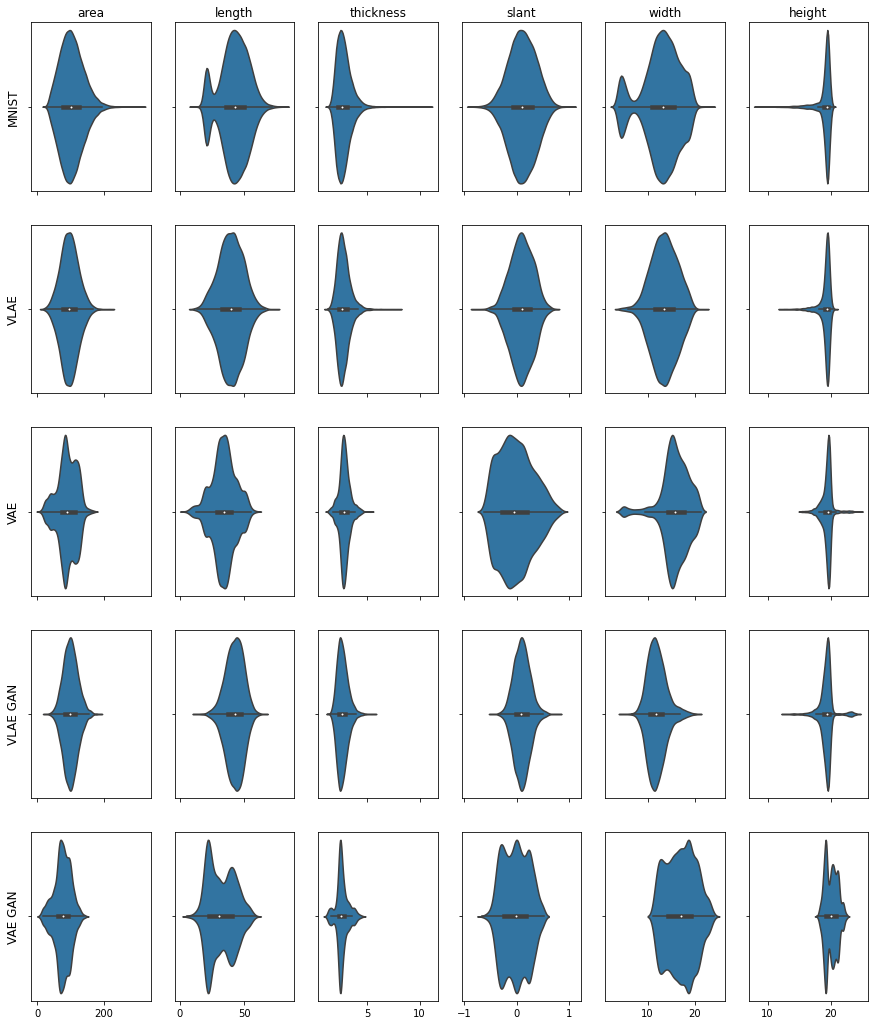

In [67]:
np.array(vlae_pd['length']).max()

73.53731957466681